# **Projeto AlgoRitmos - InternetLab**

Descrição das etapas da implementação da Coleta das Músicas Recomendadas para cada um dos 13 artistas abaixo:

- Aline Barros
- Eli Soares
- Adriana Calcanhotto
- Gilberto Gil
- Drik Barbosa
- Rico Dalasam
- Mc Dricka
- Mc Poze do Rodo
- Marília Mendonça
- Henrique e Juliano
- Jorge e Mateus
- Gusttavo Lima
- Os Barões da Pisadinha

**1. Obter uma chave de acesso para as respectivas APIs:**

- Spotify: https://developer.spotify.com
- Deezer: https://developers.deezer.com

**2. Instalação das Bibliotecas:**
- pip install spotipy
- pip install deezer-python

**3. Coleta dos ID's dos 13 artistas [Spotify e Deezer]:**

In [ ]:
import os
import deezer
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

def get_artistid_spotify(artist_name):
    os.environ['SPOTIPY_CLIENT_ID'] = 'SPOTIPY_CLIENT_ID'
    os.environ['SPOTIPY_CLIENT_SECRET'] = 'SPOTIPY_CLIENT_SECRET'

    client_credentials_manager = SpotifyClientCredentials()
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    results = sp.search(q='artist:' + artist_name, type='artist')
    items = results['artists']['items']
    artist_id = items[0]['id']

    if len(items) > 0:
        return artist_id
    else:
        return None

def get_artistid_deezer(artist_name):
    access_token = 'YOUR_ACCESS_TOKEN'
    client = deezer.Client(access_token = access_token)

    artist = client.search_artists(artist_name)
    return artist[0].id


#exemplos:
print(get_artistid_spotify('Adriana Calcanhotto'))
print(get_artistid_deezer('Adriana Calcanhotto'))

**ID's Tabelados:**

| # | Artista | ID Spotify | ID Deezer |
| --- | --- | --- | --- |
| 1 | Aline Barros | 5VBwbhqmLEaiF6fcRC682W | 14000 |
| 2 | Eli Soares | 5zblJYkCzvB51Jh29FB07V | 5503854 |
| 3 | Adriana Calcanhotto | 72f733zGuCPEzCSLs9wOVi | 4333 |
| 4 | Gilberto Gil | 7oEkUINVIj1Nr3Wnj8tzqr | 2077 |
| 5 | Drik Barbosa | 1VJZvjGu80pBwk0qeJz8ZR | 5819296 |
| 6 | Rico Dalasam | 5nbaj9RaJdFNlS5ZxoqN97 | 6858071 |
| 7 | Mc Dricka | 4d175LvxCzxt5vHbJyv49q | 12610223 |
| 8 | Mc Poze do Rodo | 28ie4NNTa2VW2QV4Zray8M | 63912472 |
| 9 | Marília Mendonça | 1yR65psqiazQpeM79CcGh8 | 7068771 |
| 10 | Henrique e Juliano | 3p7PcrEHaaKLJnPUGOtRlT | 4876653 |
| 11 | Jorge e Mateus | 1elUiq4X7pxej6FRlrEzjM | 3881631 |
| 12 | Gusttavo Lima | 7MiDcPa6UiV3In7lIM71IN | 1541592 |
| 13 | Os Barões da Pisadinha | 5Lv2GUVwqmQBPwrTrxucE5 | 61474832 |

**4. Configurações de navegador para a execução dos bots:**

O navegador utilizado neste projeto foi o Firefox. Assim, todas as configurações abaixo foram feitas para este navegador.

**4.1. Instalação da extensão para a execução de abas como containers:**

https://addons.mozilla.org/en-US/firefox/addon/multi-account-containers/

**4.2. Instalação da extensão que permite o manuseio via código de abas containers:**

https://addons.mozilla.org/en-US/firefox/addon/open-url-in-container/

**4.3. Habilitar o Digital Rights Managements (DRM) Content:**

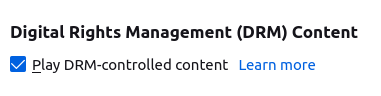

**4.4. Criação de profiles para criar as identificações das abas containers:**

about:profiles → Create a New Profile

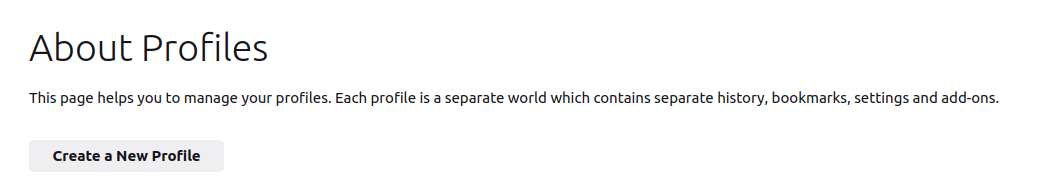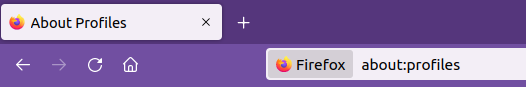

**5. Código para coletar as músicas recomendadas:**

**5.1. Código para Spotify**

In [ ]:
#código para recuperar o ID das músicas recomendadas no Spotify

import time
from bs4 import BeautifulSoup
from selenium import webdriver

def open_profile_firefox():
    fp = webdriver.FirefoxProfile('ENDEREÇO DO FIREFOX PROFILE CRIADO')

    browser = webdriver.Firefox(fp)

    #login no spotify
    url_login = "https://accounts.spotify.com/en/login?continue=https%3A%2F%2Fopen.spotify.com%2F"
    browser.get(url_login)
    time.sleep(5)

    browser.find_element_by_id('login-username').send_keys('LOGIN_DO_BOT')
    browser.find_element_by_id('login-password').send_keys('SENHA_DO_BOT')
    browser.find_element_by_id('login-button').click()
    time.sleep(2)

    #exemplo: rádio adriana calcanhotto
    url_playlist = "ext+container:name=NOME_DO_CONTAINER&url=https://open.spotify.com/playlist/37i9dQZF1E4jOqF5ykPeUX"    
    browser.get(url_playlist)
    time.sleep(5)

    playlist_dados = browser.find_element_by_xpath("//div[@data-testid='playlist-tracklist']")

    html_dados = playlist_dados.get_attribute("innerHTML")

    soup_dados = BeautifulSoup(html_dados, "html.parser")
    #no momento da execução da coleta, a identificação da classe era essa
    lista_btns = soup_dados.find_all("button", {"class": "RfidWIoz8FON2WhFoItU"})

    lista_ids_musicas = []

    #id das músicas
    for btn in lista_btns:
        #print(btn['aria-label'])
        lista_ids_musicas.append(btn['aria-label'])

#código para recuperar dados das músicas após obter os ID's
#exemplo: music_id = '0JJNqQP2pHabzVT43W7SO5'
def get_music_data_spotify(musica_id):
    results = sp.track(musica_id)
    
    if len(results) > 0:
        artista_nome = results['artists'][0]['name']
        musica_nome = results['name']
        return artista_nome, musica_nome
    else:
        return None        

**5.2. Código para Deezer**

In [ ]:
#código para recuperar os dados das músicas recomendadas no Deezer

import time
from bs4 import BeautifulSoup
from selenium import webdriver

#função para dar play nas recomendações
def open_profile_deezer():
    fp = webdriver.FirefoxProfile('ENDEREÇO DO FIREFOX PROFILE CRIADO')

    browser = webdriver.Firefox(fp)

    #login no deezer
    url_login = "https://www.deezer.com/en/login"
    browser.get(url_login)
    time.sleep(5)

    browser.find_element_by_id('login-username').send_keys('LOGIN')
    browser.find_element_by_id('login-password').send_keys('SENHA')
    browser.find_element_by_id('login-button').click()
    time.sleep(2)

    #rádio mix adriana calcanhotto
    url_playlist = "ext+container:name=NOME_DO_CONTAINER&url=https://www.deezer.com/br/artist/4333"
    browser.get(url_playlist)
    time.sleep(5)

    #clica no botão "mix" para que as músicas comecem a ser recomendadas
    browser.find_element_by_xpath("//button[@data-testid='artist-play-button']").click()    
    

#executar após a área de recomendações ter sido preenchida com a quantidade de músicas desejada
def collect_profile_deezer():
    fp = webdriver.FirefoxProfile('ENDEREÇO DO FIREFOX PROFILE CRIADO')

    browser = webdriver.Firefox(fp)
    
    playlist_dados = browser.find_element_by_xpath("//div[@class='queuelist-tracklist-inner']")

    html_dados = playlist_dados.get_attribute("innerHTML")

    soup_dados = BeautifulSoup(html_dados, "html.parser")

    lista_musicas = soup_dados.find_element_by_xpath("//span[@data-testid='title']")
    lista_artistas = soup_dados.find_element_by_xpath("//span[@data-testid='artist']")

**6. Armazenamento das coletas:**

In [ ]:
#neste projeto, o primeiro armazenamento dos dados coletados foi em um arquivo csv.
#posteriormente, estes dados foram importados em outras plataformas para armazenamento mais eficiente (sql) ou análise (sql e tableau)

import csv

#arquivo no formato [plataforma]_[nome artista]_[data coleta]
with open('coleta_spotify_artista_data.csv', 'a') as f:
    writer = csv.writer(f)

    writer.writerow([id_unico, plataforma, artista_nome, musica_nome, bot_id, data_execucao, turno_execucao])

#arquivo no formato [plataforma]_[nome artista]_[data coleta]
with open('coleta_deezer_artista_data.csv', 'a') as f:
    writer = csv.writer(f)

    writer.writerow([id_unico, plataforma, lista_artistas[i], lista_musicas[i], bot_id, data_execucao, turno_execucao])    